# Example Usage Applied to Venus Lineaments

*Data from [Ganiki Planitia Quadrangle (V–14)](https://pubs.usgs.gov/sim/3121/)*

Radial lineaments on Venus are intriguing geological features indicative of the planet's dynamic surface and internal processes. These lineaments are essentially long, linear structures that radiate outward from a central point. The presence of radial lineaments on Venus provides valuable insights into the planet's geological history and its current geodynamic behavior. They can indicate the locations of past volcanic activity, the movement of tectonic plates (if applicable, given Venus's thick lithosphere and unique tectonic regime), or the impact of asteroids and comets. These features are also important for understanding the crustal stress patterns and may help to map out the subsurface structures of the planet.

1. Load in a shape file with multiple features.
2. Find the lines you want.
3. Perform the [Hough Transform](https://en.wikipedia.org/wiki/Hough_transform)
4. Visualize the Results
5. Radial Feature extraction
6. Save features

![Venus Ganiki Map](venusMap.png)

*Grosfils, E. B., Long, S. M., Venechuk, E. M., Hurwitz, D. M., Richards, J. W., Kastl, B., ... & Hardin, J. S. (2011). Geologic map of the ganiki planitia quadrangle (v–14), venus.*

In [1]:
#Let's begin by loading the module
import linkinglines as ll

# Load the example dataset 
dikeset=ll.readFile('/../data/exampleGanikiSegments.shp', preprocess=True)


ValueError: Invalid path

The next step is to perform the Hough Transform

Besides the data the input in the hough transform code is the center (xc,yc)
which is assumed to be the mean of the X and Y coordinates. It can be set arbitrarily. You may wish to set this to investigate structures in your dataset. But most people will use the default settings.


In [ ]:

dikeset, xc, yc=ll.HoughTransform(dikeset)
print(xc,yc) 

print(dikeset.columns)

-11684130.47751338 4503174.613590027
Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'id', 'Formation', 'Xstart', 'Ystart', 'Xend',
       'Yend', 'seg_length', 'rho', 'theta', 'HashID', 'Xmid', 'Ymid', 'yc',
       'xc', 'PerpOffsetDist', 'PerpIntX', 'PerpIntY', 'Date_Changed',
       'ScaledRho', 'Labels'],
      dtype='object')


Visualize the hough transform data.

km scale label


/home/akh/myprojects/Dikes_Linking_Project/Linking-and-Clustering-Dikes/scripts/../src/plotmod.py:1198: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


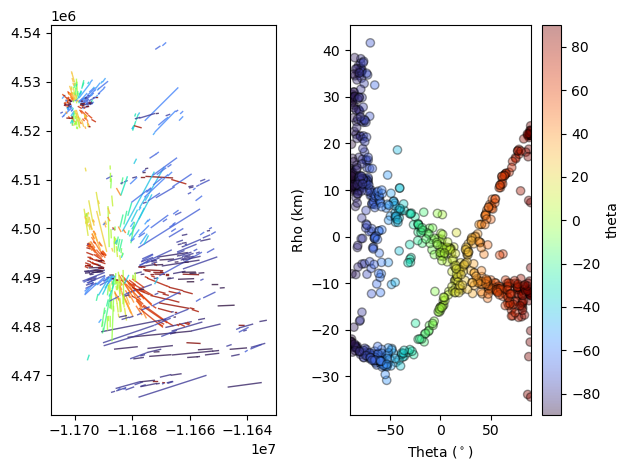

In [13]:
fig, [ax_main, ax_xDist, ax_yDist]=plotScatterHist(dikeset, "theta", 
                                                   "rho", hue='Ymid', palette="icefire")

Now we will apply the radial feature extraction. The 'tol' feature is the radius of the area of intersection and this is set to 15km. Then save the features.

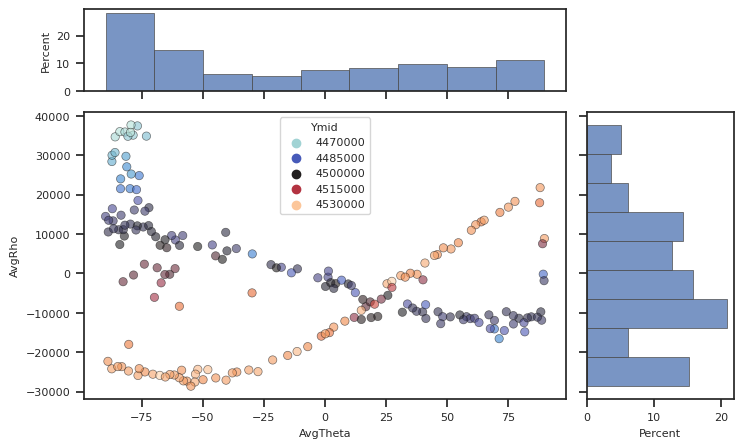

In [19]:
rad=ll.RadialFit(dikeset[mask])

close, rad=ll.NearCenters(dikeset, rad, tol=15000)
ll.writeCenterWKT(rad, 'VenusGanikiRadialFitsCenters.csv')


In [ ]:

fig,ax=plt.subplots()
fig.set_size_inches( 4.3, 4.3)


sns.scatterplot(dikeset, x='theta', y=rho/1000, hue='abstheta', legend=False, palette='viridis', ax=ax, alpha=0.4, edgecolor="black")

ax.set_xlabel('Theta ($^\circ$)', fontsize=14)
ax.set_ylabel('Rho (km)', fontsize=14)

#Plot the fit onto the data

angles=np.linspace(-90,90) #make an array of angles from -90,90 for plotting
rhorad=ll.CenterFunc(angles,rad['Center'][0][0], rad['Center'][0][1], xc,yc)/1000 #calculate rho values, convert to kilometers
#CenterFunc is the implementation of above equation


ax.plot(angles, rhorad, 'k')